<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Computer%20Vision/Computer_vision_exercises_part_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision - Deep Learning - 6th Task
@author Tomasz Skrzypczyk

Solved by Boguslaw Konefal

In [1]:
!pip install light-the-torch
!ltt install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# MNIST with MLP classifier

Do not use GPU for this exercise!

In [2]:
# do not modify this cell
import numpy as np
import pandas as pd
import tensorflow as tf 
tf.random.set_seed(1234)

from sklearn.datasets import fetch_openml

dane_mnist = fetch_openml('mnist_784', version=1)
dane_mnist.target = dane_mnist.target.astype(np.uint8)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dane_mnist.data, dane_mnist.target,test_size= 0.1, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.1, random_state=1234)

print("X_train: ", {X_train.shape})
print("X_val: ", {X_val.shape})
print("X_test: ", {X_test.shape})
print("y_train: ", {y_train.shape})
print("y_val: ", {y_val.shape})
print("y_test: ", {y_test.shape})

X_train:  {(56700, 784)}
X_val:  {(6300, 784)}
X_test:  {(7000, 784)}
y_train:  {(56700,)}
y_val:  {(6300,)}
y_test:  {(7000,)}


In [3]:
y_test.value_counts()

1    810
7    732
4    719
3    717
9    709
2    703
6    670
8    663
0    647
5    630
Name: class, dtype: int64

# Model's definition

Write a Neural Network for classification with:
   

*   **relu** as activation function in hidden layers,
*   Use proper activation function in output layers.
*   Set proper input and output number of neurons.
*   Add **accuracy** metric
*   proper **loss** function,
*   use **adam** optimizer.

You can consult the model summary in the next cell. Do not use the OneHotEncoding for your labels.
    

In [4]:
def create_and_compile_model():
 
 
  # define your model here:
  model=tf.keras.Sequential()
  #add your layers here
  model.add(tf.keras.layers.Dense(256, input_shape=(28*28,),activation='relu'))
  model.add(tf.keras.layers.Dense(256, activation='relu'))
  model.add(tf.keras.layers.Dense(256, activation='relu'))
  model.add(tf.keras.layers.Dense(256, activation='relu'))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # sparse poniewaz nie ma one hot encoding
              metrics=['accuracy'])
  
  return model

In [5]:
# do not modify this cell
model = create_and_compile_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 400,906
Trainable params: 400,906
Non-trainable params: 0
_________________________________________________________________


In [6]:
# run validation predictions to check if you defined the network correctly
predictions = model.predict(X_val/255.0)

# do not modify this code
#== 0, "Something went wrong"
#assert np.argmax(predictions, axis=1)[1] == 9, "Something went wrong"
#assert np.argmax(predictions, axis=1)[2] == 9, "Something went wrong"
#assert np.argmax(predictions, axis=1)[3] == 9, "Something went wrong"

197/197 [==============================] - 2s 6ms/step


# Train the model

Train the model, remember to:


*   Use training and validation data
*   Use early stopping with patience set to 3, and monitor the accuracy on the validation set, set restore_best_weights=True
*   Set batch size to 64
*   Set max number of epochs to 50

Remember to normalize the data (!!!)



In [7]:
es =tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, verbose=1,
                      mode='auto', 
                      restore_best_weights=True)
history = history = model.fit(X_train, 
                    y_train, 
                    epochs=50, 
                    batch_size=64,
                    callbacks=[es],
                    validation_split=0.2,
                                       )

Epoch 1/50
709/709 [==============================] - 15s 20ms/step - loss: 0.8124 - accuracy: 0.8848 - val_loss: 0.2667 - val_accuracy: 0.9301
Epoch 2/50
709/709 [==============================] - 14s 20ms/step - loss: 0.1901 - accuracy: 0.9456 - val_loss: 0.1889 - val_accuracy: 0.9497
Epoch 3/50
709/709 [==============================] - 8s 12ms/step - loss: 0.1426 - accuracy: 0.9582 - val_loss: 0.2050 - val_accuracy: 0.9467
Epoch 4/50
709/709 [==============================] - 9s 12ms/step - loss: 0.1160 - accuracy: 0.9659 - val_loss: 0.1785 - val_accuracy: 0.9548
Epoch 5/50
709/709 [==============================] - 9s 13ms/step - loss: 0.0996 - accuracy: 0.9705 - val_loss: 0.1598 - val_accuracy: 0.9593
Epoch 6/50
709/709 [==============================] - 8s 11ms/step - loss: 0.0877 - accuracy: 0.9745 - val_loss: 0.1532 - val_accuracy: 0.9602
Epoch 7/50
709/709 [==============================] - 9s 13ms/step - loss: 0.0861 - accuracy: 0.9748 - val_loss: 0.1582 - val_accuracy: 0.96

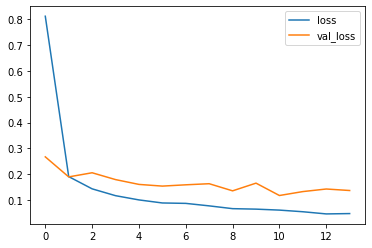

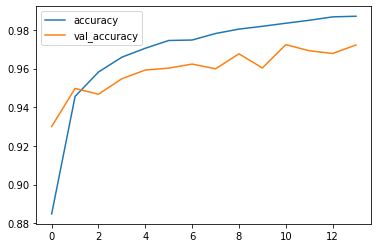

In [14]:
# do not modify this cell
# assert len(history.history["loss"]) == 6
# assert "accuracy" in history.history, "Use the accuracy metric!"
# assert "val_loss" in history.history, "Use validation data!"
pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()

In [10]:
# Test the model using test set
test_predictions = model.evaluate(X_test, y_test)
#test_predictions = np.squeeze(test_predictions)

219/219 [==============================] - 1s 4ms/step - loss: 0.1411 - accuracy: 0.9707


In [12]:
# do not modify this cell
#assert test_predictions == [0.1114908829331398, 0.975428581237793], "Did you remember to normalize the data?"
print(f"Your accuracy is {round(test_predictions[1]*100, 2)}%")

Your accuracy is 97.07%


# Test your model

*   Pick a sample image from your test dataset using DataFrame.sample method ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)).
*   Set random seed to 1234. 
*   Use your model to make a prediciton.
*   Display the predicted numbel/class.

In [13]:
import cv2
from google.colab.patches import cv2_imshow

# Extract a random sample from your test set
image = X_test.sample(1).to_numpy()
print(image.shape)
# and display it
cv2_imshow(image.reshape(28,28))

# make a prediction on the image, remember that your model expect your input data to be passed in batches,
# so reshape your input properly
prediction = model.predict([image])

print(np.argmax(prediction, axis=1))
# print your predicted class, not the softmax output (use numpy)
print("Predicted class", np.argmax(prediction, axis=1)[0])
# do not modify this code
# assert prediction.tolist() == [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

(1, 784)


1/1 [==============================] - 0s 92ms/step
[2]
Predicted class 2


Your output should look sth like this:


[photo here]


1/1 [==============================] - 0s 18ms/step


Predicted class 0